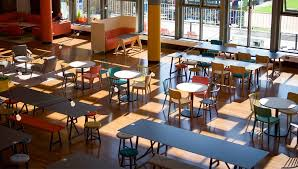

<p style="text-align: center; font-size: 30px;"><b>Cyborg Canteen</b></p>



# Chabot Input/Output

In [1]:
from collections import Counter
from utils.responses import responses, blank_spot
from utils.user_functions import preprocess, compare_overlap, pos_tag, extract_nouns, compute_similarity
import spacy
word2vec = spacy.load("en_core_web_sm")

exit_commands = ("quit", "goodbye", "exit", "no")

<p style="font-size: 20px;"><b>Task 1</b></p>  
Let’s begin at the end! We must provide a way for our user to end a conversation once they have had all their questions answered. Note that `exit_commands`, a list of strings commonly used as exit commands from a chatbot system, is already defined in the workspace.

- Define a `.make_exit()` method with `self` and `user_message` as parameters.
- Within `.make_exit()`, write a for loop over each object in `exit_commands`.
- For each object in `exit_commands`, check if the object also occurs in `user_message`.
- If the object does occur in `user_message`, print a goodbye message to the console, and return `True`.
- If the object does not occur in `user_message`, do nothing.


In [2]:
class ChatBot:
    #define .make_exit() below:
    def make_exit(self, user_message):
        for string_object in exit_commands:
            if string_object in user_message:
                print("Thanks for visiting us!")
                return True

<p style="font-size: 20px;"><b>Task 2</b></p>  
Of course, we should provide a method that allows our chatbot to chat:

- Define a `.chat()` method with `self` as a parameter.
- Within the `.chat()` method, write a welcoming prompt for a user question, using the `input()` function. Set the result equal to `user_message`.
 - Create a while not loop that checks whether `.make_exit(user_message)` is `True` at each iteration.
- Within the while loop, call `.respond()` on `user_message` and assign the result to `user_message`.


In [3]:
class ChatBot:
    #define .make_exit() below:
    def make_exit(self, user_message):
        for string_object in exit_commands:
            if string_object in user_message:
                print("Thanks for visiting us!")
            return True

      
    #define .chat() below:
    def chat(self):
        user_message = input("Welcome to our canteen, we hope you will find the most delicious cyborg recipe! ")
        while not self.make_exit(user_message):
            user_message = self.respond(user_message)

<p style="font-size: 20px;"><b>Task 3</b></p>  
Let’s test out the `.make_exit()` functionality of the bot:

Outside of the `ChatBot` class, initialize a `ChatBot` instance.
Call the `.chat()` method on the `ChatBot` instance.
Run `python3 script.py` in the console to start your chatbot!
Ask a question that includes one of the terms in `exit_commands`.


In [4]:
instance_bot = ChatBot()
instance_bot.chat()

Welcome to our canteen, we hope you will find the most delicious cyborg recipe! exit


# Intent Classification

<p style="font-size: 20px;"><b>Task 4</b></p>  
We’ve already imported a collection of functions created throughout the Retrieval-based Chatbots lesson into the workspace, as well as a set of pre-defined responses for our retrieval-based bot.

Check out the `user_functions.py` file to refresh your understanding of the `preprocess()`, `compare_overlap()`, `extract_nouns()`, and `compute_similarity()` functions.
Look over the `responses.py` file to see the collection of responses already written for our bot.


### `preprocess(input_sentence)`

Goal: **normalize raw text into comparable tokens**.

* lowercases (`"Hello"` → `"hello"`)
* removes punctuation (`"t-shirts!"` → `"tshirts"`)
* tokenizes into words
* removes stopwords (common words like “the”, “and”, etc.)
  Output: a **list of “meaningful” tokens** you can use for matching.

### `compare_overlap(user_message, possible_response)`

Goal: **score how similar two token lists are by simple word overlap**.

* counts how many tokens from `user_message` appear in `possible_response`
  Output: an **integer score** (higher = more shared words = more likely match).

### `pos_tag(tokens)`

Goal: **assign a Part-of-Speech tag to each token** (noun, verb, adjective, …).

* it’s a wrapper around NLTK’s `pos_tag` so the rest of your project can import it from `utils.user_functions`
  Output: list of `(token, tag)` pairs, e.g. `("package","NN")`.

### `extract_nouns(tagged_message)`

Goal: **filter the POS-tagged tokens to keep only nouns** (entities/objects).

* keeps tags starting with `"N"` (`NN`, `NNS`, `NNP`, `NNPS`)
  Output: list of noun tokens, e.g. `["shirts", "weekend", "package"]`.

### `compute_similarity(tokens, category)`

Goal: **rank which user nouns best match a placeholder category** using embeddings.

* for each token (spaCy token), computes semantic similarity to `category` (a spaCy Doc/Token)
  Output: list like:
  `[["wednesday", "weekday", 0.45], ["dog", "weekday", 0.21], ...]`

In a chatbot, you’d pick the **highest-similarity noun** and insert it into a response “blank spot” (Madlibs-style template).


<p style="font-size: 20px;"><b>Task 5</b></p>  
Let’s build a set of BoW models from our data:

Define a `.find_intent_match()` method with `self`, `responses`, and `user_message` as parameters.
In the body of `.find_intent_match()`, call `preprocess()` on `user_message`, then call `Counter()` on the result to create a bag-of-words (BoW) model.
Call `preprocess()` on each item in `responses`, then call `Counter()` on the result.


In [5]:
class ChatBot:
    #define .make_exit() below:
    def make_exit(self, user_message):
        for string_object in exit_commands:
            if string_object in user_message:
                print("Thanks for visiting us!")
            return True

      
    #define .chat() below:
    def chat(self):
        user_message = input("Welcome to our canteen, we hope you will find the most delicious cyborg recipe! ")
        while not self.make_exit(user_message):
            user_message = self.respond(user_message)

  
    #define .find_intent_match() below:
    def find_intent(self, responses, user_message):
        bow_user_message = Counter(preprocess(user_message))
        bow_responses = [Counter(preprocess(response) for response in responses)]

<p style="font-size: 20px;"><b>Task 6</b></p>  
Now we can select the response that best matches the intent of the user message:

Still in the body of `.find_intent_match()`, apply `compare_overlap()` on each response in `processed_responses`. Save the resulting list item to `similarity_list`.
Use Python’s `.index()` method and `max()` function to select the index of the highest similarity score in `similarity_list`. Save the result to `response_index`.
Use list indexing to return the element at index `response_index` in `responses`.


In [6]:
class ChatBot:
  
  #define .make_exit() below:
  def make_exit(self, user_message):
    for string_object in exit_commands:
      if string_object in user_message:
        print("Thanks for visiting us!")
        return True

      
  #define .chat() below:
  def chat(self):
    user_message = input("Welcome to our canteen, we hope you will find the most delicious cyborg recipe! ")
    while not self.make_exit(user_message):
      user_message = self.respond(user_message)

  
  #define .find_intent_match() below:
  def find_intent_match(self, responses, user_message):
    bow_user_message = Counter(preprocess(user_message))
    bow_responses = [Counter(preprocess(response)) for response in responses]
    similarity_list = [compare_overlap(bow_user_message, response) for response in bow_responses]
    response_index = similarity_list.index(max(similarity_list))
    return responses[response_index]

  #define .find_entities() below:
 
  #define .respond() below:
  def respond(self, user_message):
    best_response = self.find_intent_match(responses, user_message)
    print(best_response)
    input_message = input("Other questions? ")
    return input_message 

<p style="font-size: 20px;"><b>Task 7</b></p>  
Let’s test our `.find_intent_match()` method:

Define a method called `.respond()`, with `self` and `user_message` as parameters.
Assign the result of calling `.find_intent_match(responses, user_message)` to a variable called `best_response`.
Within `.respond()`, print `best_response` to the console.
To allow for multiple questions, use the `input()` function to prompt the user for another question. Assign the result to `input_message`.
Return `input_message`.
Run your script in the terminal to check if a response is returned!


In [7]:
class ChatBot:
  
  #define .make_exit() below:
  def make_exit(self, user_message):
    for string_object in exit_commands:
      if string_object in user_message:
        print("Thanks for visiting us!")
        return True

      
  #define .chat() below:
  def chat(self):
    user_message = input("Welcome to our canteen, we hope you will find the most delicious cyborg recipe! ")
    while not self.make_exit(user_message):
      user_message = self.respond(user_message)

  
  #define .find_intent_match() below:
  def find_intent_match(self, responses, user_message):
    bow_user_message = Counter(preprocess(user_message))
    bow_responses = [Counter(preprocess(response)) for response in responses]
    similarity_list = [compare_overlap(bow_user_message, response) for response in bow_responses]
    response_index = similarity_list.index(max(similarity_list))
    return responses[response_index]

  #define .find_entities() below:
 
  #define .respond() below:
  def respond(self, user_message):
    best_response = self.find_intent_match(responses, user_message)
    print(best_response)
    input_message = input("Other questions? ")
    return input_message 

instance_bot = ChatBot()
instance_bot.chat()

# Entity Recognition

<p style="font-size: 20px;"><b>Task 8</b></p>  
Let’s extract candidate entities from the user message:

Define a `.find_entities()` method with `self` and `user_message` as parameters.
In the body of `.find_entities()`, call `preprocess()` on `user_message`. Then call `pos_tag()` on the result.
Call `extract_nouns()` on `tagged_user_message`. Save the result to `message_nouns`.


In [8]:
#define .respond() below:
def respond(self, user_message):
    best_response = self.find_intent_match(responses, user_message)
    print(best_response)
    input_message = input("Other questions? ")
    return input_message

<p style="font-size: 20px;"><b>Task 9</b></p>  
Now we can fit a word2vec model on our candidate entities:

Use `" ".join()` to create a concatenated string from `message_nouns`. Call `word2vec()` on this string. Save the result to a variable called `tokens`.
Call `word2vec()` on `blank_spot`. Save the result to a variable called `category`.
Call `compute_similarity()` on `tokens` and `category`. Save the result to `word2vec_result`.


In [9]:
#define .find_entities() below:
def find_entities(self, user_message):
    tagged_user_message = pos_tag(preprocess(user_message))
    message_nouns = extract_nouns(tagged_user_message)
    tokens = word2vec(" ".join(message_nouns))
    category = word2vec(blank_spot)
    word2vec_result = compute_similarity(tokens, category)

<p style="font-size: 20px;"><b>Task 10</b></p>  
Finally, let’s select the entity with the highest similarity score:

Call `sort(key=lambda x: x[2])` on `word2vec_result`. This will sort the result list by ascending similarity score.
Write an if statement to check whether `word2vec_result` has at least one item. If False, return `blank_spot`. Otherwise, return the first element of the last list item in `word2vec_result`.


In [10]:
#define .find_entities() below:
def find_entities(self, user_message):
    tagged_user_message = pos_tag(preprocess(user_message))
    message_nouns = extract_nouns(tagged_user_message)
    tokens = word2vec(" ".join(message_nouns))
    category = word2vec(blank_spot)
    word2vec_result = compute_similarity(tokens, category)
    word2vec_result.sort(key=lambda x: x[2])
    if len(word2vec_result) == 0:
      return blank_spot
    else:
      return word2vec_result[-1][0]

<p style="font-size: 20px;"><b>Task 11</b></p>  
Let’s pull together the results from the Intent Classification and Entity Extraction tasks:

Within `.respond()`, delete the line which prints `best_response` to the console.
Directly after the call to `.find_intent_match`, assign the result of calling `.find_entities(user_message)` to `entity`.
Call Python’s `.format()` method, with `entity` as an argument, on `best_response`. Print the result to the terminal.
Call your script from the terminal to test out your bot!


In [11]:
  #define .respond() below:
  def respond(self, user_message):
    best_response = self.find_intent_match(responses, user_message)
    entity = self.find_entities(user_message)
    print(best_response.format(entity))
    input_message = input("Other questions? ")
    return input_message

In [12]:
class ChatBot:
  
  #define .make_exit() below:
  def make_exit(self, user_message):
    for string_object in exit_commands:
      if string_object in user_message:
        print("Thanks for visiting us!")
        return True

      
  #define .chat() below:
  def chat(self):
    user_message = input("Welcome to our canteen, we hope you will find the most delicious cyborg recipe! ")
    while not self.make_exit(user_message):
      user_message = self.respond(user_message)

  
  #define .find_intent_match() below:
  def find_intent_match(self, responses, user_message):
    bow_user_message = Counter(preprocess(user_message))
    bow_responses = [Counter(preprocess(response)) for response in responses]
    similarity_list = [compare_overlap(bow_user_message, response) for response in bow_responses]
    response_index = similarity_list.index(max(similarity_list))
    return responses[response_index]

  #define .find_entities() below:
  def find_entities(self, user_message):
    tagged_user_message = pos_tag(preprocess(user_message))
    message_nouns = extract_nouns(tagged_user_message)
    tokens = word2vec(" ".join(message_nouns))
    category = word2vec(blank_spot)
    word2vec_result = compute_similarity(tokens, category)
    word2vec_result.sort(key=lambda x: x[2])
    if len(word2vec_result) == 0:
      return blank_spot
    else:
      return word2vec_result[-1][0]


  #define .respond() below:
  def respond(self, user_message):
    best_response = self.find_intent_match(responses, user_message)
    entity = self.find_entities(user_message)
    print(best_response.format(entity))
    input_message = input("Other questions? ")
    return input_message

# Improve your bot!

<p style="font-size: 20px;"><b>Task 12</b></p>  
While our bot functions, you may find that after the first few user questions its responses become a bit repetitive. One of the major limitations of retrieval-based chatbots is a reliance on a set of pre-defined responses. Try adding more responses to `responses.py` in order to extend the functionality of your bot!


In [13]:
instance_bot = ChatBot()
instance_bot.chat()

Welcome to our canteen, we hope you will find the most delicious cyborg recipe! Any gluten recipes?


/home/alamanna1/code/antoninolm/chatbots_projects/cyborg_cantina/utils/user_functions.py:48: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  output_list.append([token.text, category.text, token.similarity(category)])


The recipes has a gluten-free option, but it is not vegan.
Other questions? what are the sides?
We have a selection of sides to go along with the sides, including mashed potatoes and steamed vegetables.
Other questions? Do you have spicy food?
food includes habanero, so it is a bit spicy!
Other questions? What is the most popular meal?
The meal is one of our most popular dishes this week.
Other questions? Have you got any healthy option?
The option has a gluten-free option, but it is not vegan.
Other questions? what'stoday?
The whatstoday has a gluten-free option, but it is not vegan.
Other questions? exit
Thanks for visiting us!
